#### Parte 1: Preparação do Ambiente

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [20]:
np.random.seed(42)

In [21]:
categorias = ['Eletrônicos', 'Roupas', 'Alimentos', 'Livros', 'Brinquedos']
datas = pd.date_range(start='2023-01-01', end='2023-12-31', freq='D')
num_registros = len(datas)

In [22]:
data = {
       'Data': np.random.choice(datas, num_registros),
       'Categoria': np.random.choice(categorias, num_registros),
       'Quantidade_Vendida': np.random.randint(1, 100, num_registros),
       'Preco_Unitario': np.round(np.random.uniform(10, 500, num_registros), 2)
   }
   
df = pd.DataFrame(data)

df['Valor_Total'] = df['Quantidade_Vendida'] * df['Preco_Unitario']

In [23]:
df.to_csv('dados_vendas.csv', index=False)

print("Conjunto de dados gerado e salvo como 'dados_vendas.csv'")

Conjunto de dados gerado e salvo como 'dados_vendas.csv'


#### Parte 2: Consulta e Filtragem de Dados

In [24]:
df = pd.read_csv('dados_vendas.csv')

**Pergunta 1: Quantas linhas e colunas existem no DataFrame carregado?**

In [25]:
df.shape

(365, 5)

O DataFrame possui 365 linhas e 5 colunas.

**Pergunta 2: Quais são os tipos de dados das colunas?**

In [26]:
df.dtypes

Data                   object
Categoria              object
Quantidade_Vendida      int64
Preco_Unitario        float64
Valor_Total           float64
dtype: object

**Exibir as primeiras 5 linhas do DataFrame:**

In [27]:
df.head()

,Data,Categoria,Quantidade_Vendida,Preco_Unitario,Valor_Total
0,2023-04-13,Roupas,74,60.43,4471.82
1,2023-12-15,Alimentos,83,272.88,22649.04
2,2023-09-28,Roupas,17,195.62,3325.54
3,2023-04-17,Roupas,85,233.93,19884.05
4,2023-03-13,Roupas,78,305.94,23863.32


**Pergunta 3: Quantas categorias únicas de produtos estão presentes no DataFrame?**

In [37]:
categorias_unicas = df['Categoria'].nunique()
print("O número de categorias únicas é igual a", categorias_unicas)

O número de categorias únicas é igual a 5


**Filtrar os dados para mostrar apenas as vendas da categoria 'Eletrônicos'**

In [39]:
eletronicos = df[df['Categoria'] == 'Eletrônicos']
eletronicos

,Data,Categoria,Quantidade_Vendida,Preco_Unitario,Valor_Total
5,2023-07-08,Eletrônicos,73,256.12,18696.76
6,2023-01-21,Eletrônicos,1,274.53,274.53
7,2023-04-13,Eletrônicos,51,248.32,12664.32
14,2023-06-01,Eletrônicos,34,303.52,10319.68
18,2023-09-15,Eletrônicos,39,121.40,4734.60
...,...,...,...,...,...
347,2023-09-10,Eletrônicos,33,431.46,14238.18
349,2023-09-13,Eletrônicos,27,201.67,5445.09
351,2023-05-08,Eletrônicos,29,243.57,7063.53
353,2023-10-08,Eletrônicos,57,427.57,24371.49


**Pergunta 4: Qual é a média do valor total das vendas na categoria 'Eletrônicos'?**

In [64]:
media_valor_eletronicos = eletronicos['Valor_Total'].mean()
media_valor_eletronicos

f'A média do valor total de vendas de eletrônicos é igual a {media_valor_eletronicos:.2f} reais.'

'A média do valor total de vendas de eletrônicos é igual a 12291.26 reais.'

**Filtrar as vendas acima de R$ 1000,00**

In [57]:
vendas_acima_1000 = df[df['Valor_Total'] > 1000]
vendas_acima_1000

,Data,Categoria,Quantidade_Vendida,Preco_Unitario,Valor_Total
0,2023-04-13,Roupas,74,60.43,4471.82
1,2023-12-15,Alimentos,83,272.88,22649.04
2,2023-09-28,Roupas,17,195.62,3325.54
3,2023-04-17,Roupas,85,233.93,19884.05
4,2023-03-13,Roupas,78,305.94,23863.32
...,...,...,...,...,...
358,2023-12-26,Brinquedos,68,147.88,10055.84
359,2023-06-23,Alimentos,86,133.80,11506.80
361,2023-04-24,Brinquedos,10,350.90,3509.00
363,2023-12-08,Brinquedos,74,270.98,20052.52


**Pergunta 5: Quantas vendas acima de R$ 1000,00 ocorreram?**

In [62]:
total_vendas_acima_1000 = vendas_acima_1000.shape[0]
total_vendas_acima_1000

f'Ocorreram {total_vendas_acima_1000} vendas acima de 1000 reais.'

'Ocorreram 330 vendas acima de 1000 reais.'

#### Parte 3: Agrupamento e Agregação

**Agrupar os dados por categoria e calcular o total de vendas por categoria**

In [65]:
total_por_categoria = df.groupby('Categoria')['Valor_Total'].sum().reset_index()
total_por_categoria

,Categoria,Valor_Total
0,Alimentos,742457.74
1,Brinquedos,1187964.04
2,Eletrônicos,897261.71
3,Livros,963685.46
4,Roupas,991215.29


**Pergunta 6: Qual categoria teve o maior valor total de vendas?**

In [70]:
maior_vendas = total_por_categoria['Valor_Total'].max()
maior_vendas

np.float64(1187964.04)

A categoria 'Brinquedos' que obteve o maior valor total de vendas.

**Calcular a quantidade média vendida por categoria:**

In [69]:
media_quantidade_categoria = df.groupby('Categoria')['Quantidade_Vendida'].mean().reset_index()
media_quantidade_categoria

,Categoria,Quantidade_Vendida
0,Alimentos,55.618182
1,Brinquedos,47.247191
2,Eletrônicos,46.780822
3,Livros,50.917808
4,Roupas,47.200000


**Pergunta 7: Qual categoria teve a maior quantidade média vendida?**

In [76]:
maior_media_vendidas = media_quantidade_categoria['Quantidade_Vendida'].max()
maior_media_vendidas

np.float64(55.61818181818182)

A categoria 'Alimentos' que obteve a maior quantidade média vendida.

#### Parte 4: Visualização de Dados

**Criar um gráfico de barras mostrando o total de vendas por categoria**

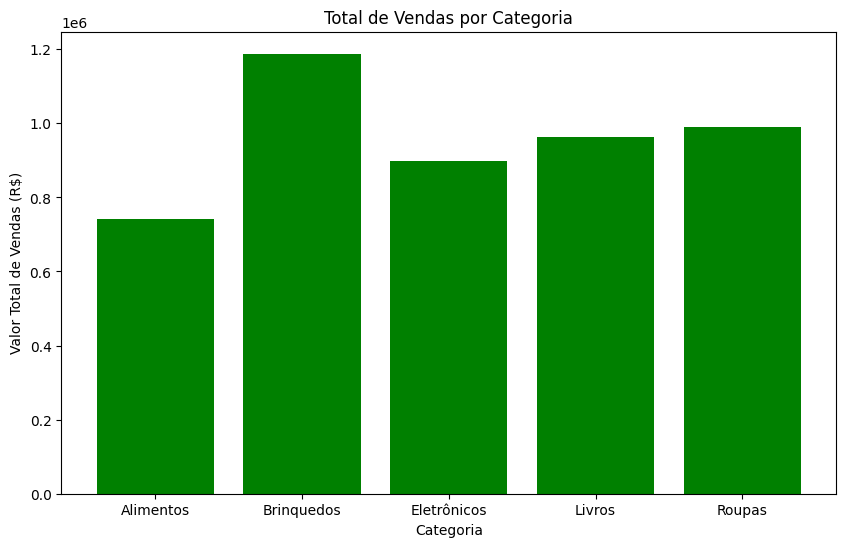

In [80]:
plt.figure(figsize=(10, 6))
plt.bar(total_por_categoria['Categoria'], total_por_categoria['Valor_Total'], color='green')
plt.xlabel('Categoria')
plt.ylabel('Valor Total de Vendas (R$)')
plt.title('Total de Vendas por Categoria')
plt.show()

**Pergunta 8: Com base no gráfico, qual categoria visualmente se destaca em termos de vendas totais?**

Pelo gráfico gerado observa-se que a categoria 'Brinquedos' que teve um maior resuldado de vendas totais.

**Criar um gráfico de linha mostrando a variação diária das vendas de 'Eletrônicos'**

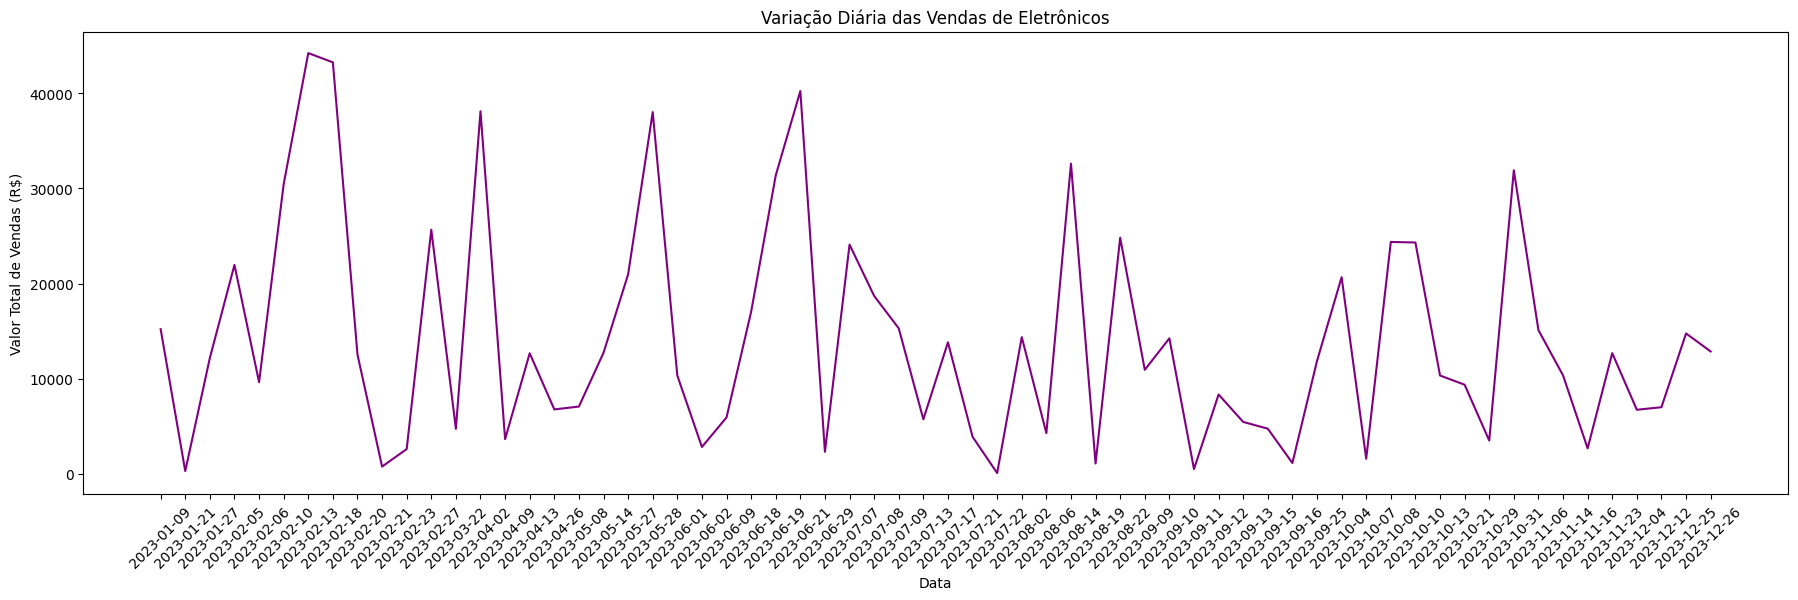

In [86]:
vendas_diarias = eletronicos.groupby('Data')['Valor_Total'].sum().reset_index()

plt.figure(figsize=(22, 6))
plt.plot(vendas_diarias['Data'], vendas_diarias['Valor_Total'], color='purple')
plt.xlabel('Data')
plt.ylabel('Valor Total de Vendas (R$)')
plt.title('Variação Diária das Vendas de Eletrônicos')
plt.xticks(rotation=45)
plt.show()

**Pergunta 9: Existe algum padrão ou tendência observável nas vendas diárias de eletrônicos?**

Pela análise do gráfico é observado que no primeiro semestre do ano foram obtidos os maiores valor de venda de eletrônicos dessa empresa com seu pico de vendas encontrado no dia 06/02/2023.
Também é visto que assim que a empresa encontra um máximo de vendas ela obtém uma quebra brusca e encontra um valor mínimo abaixo de 1000 reais.